<a href="https://colab.research.google.com/github/jingyue-nancy-gao/Summer-Microcredential/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Project: Diabetes Classification

## STEP #1: Problem Statement

The goal of this project is to make a diabetes classification model that can be used to predict something within the dataset.

---

*This project will predict whether a patient is likely to be a readmit in the hospital within 30 days *


---





Diabetes mellitus, commonly known as diabetes, is a metabolic disease  that causes high blood sugar. The hormone insulin moves sugar from the blood into your cells to be stored or used for energy. With diabetes, your body either doesn’t make enough insulin or can’t effectively use the insulin it does make. And also, untreated high blood sugar from diabetes can damage your nerves, eyes, kidneys, and other organs.



---
Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated
delivery networks. It includes over 50 features representing patient and hospital outcomes.
Information was extracted from the database for encounters that satisfied the following criteria.

It is an inpatient encounter (a hospital admission).

It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system
as a diagnosis.

The length of stay was at least 1 day and at most 14 days.

Laboratory tests were performed during the encounter.

Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in
hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test
result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient,
and emergency visits in the year before the hospitalization, etc.

---





## STEP #2: Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/CUNY - MicroCredential/Week 4/diabetic_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
dataset.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
dataset.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

## STEP #3: Exploratory Data Analysis / Visualizing the data

In [9]:
dataset.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


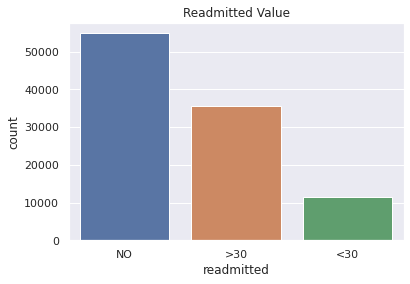

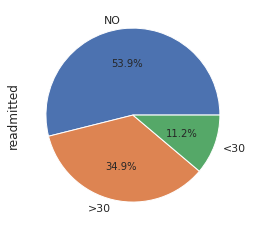

In [10]:
print(dataset.readmitted.value_counts())

sns.countplot(x = "readmitted", data = dataset)
plt.title("Readmitted Value")
plt.show()

# Pie chart
dataset.readmitted.value_counts().plot.pie(autopct = "%.1f%%")

plt.show()

*'Readmitted'*
I choose to predict whether a patient is likely to be a readmit in the hospital within 30 days.

*   No    -> 0
*   '>30' -> 0
*   '<30' -> 1






In [11]:
dataset = dataset.replace({"NO":0,
                         "<30":1,
                         ">30":0})

0    90409
1    11357
Name: readmitted, dtype: int64


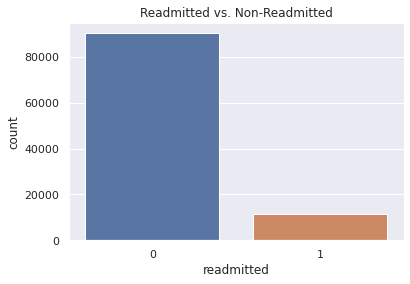

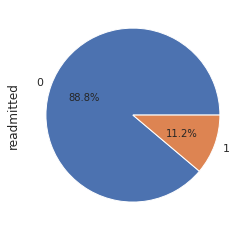

In [12]:
print(dataset.readmitted.value_counts())

sns.countplot(x = "readmitted", data = dataset)
plt.title("Readmitted vs. Non-Readmitted")
plt.show()

# Pie chart
dataset.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.show()

### Race

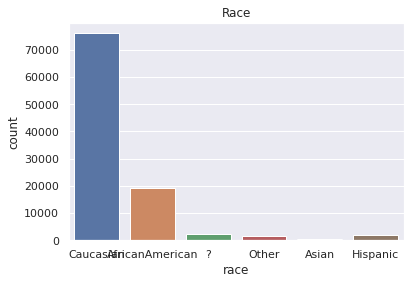

Race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64


In [13]:
sns.countplot(x=dataset.race, data = dataset)
plt.title("Race")
plt.show()

print("Race")
print(dataset.race.value_counts(normalize = True)*100)

'?','other','Asian' & 'Hispanic' are so small amount, comparing to Caucasion, so add them together to 'Other.' 

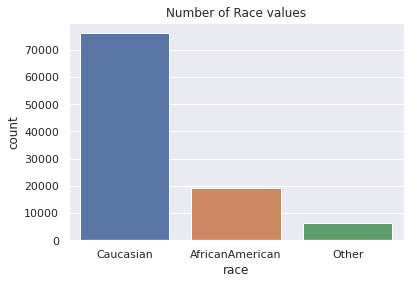

Proportion of Race After the Mapping
Caucasian          74.778413
AfricanAmerican    18.876639
Other               6.344948
Name: race, dtype: float64


In [14]:
mapped_race = {"Asian":"Other","Hispanic":"Other", "?":"Other"}
dataset.race = dataset.race.replace(mapped_race)

sns.countplot(x="race", data = dataset)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(dataset.race.value_counts(normalize= True)*100)

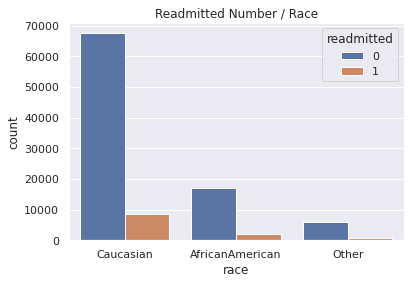

In [15]:
sns.countplot(x="race", hue= "readmitted", data = dataset)
plt.title("Readmitted Number / Race")
plt.show()

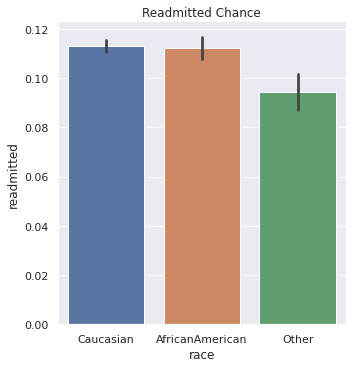

In [16]:
sns.catplot(x = "race", y = "readmitted",
            data = dataset, kind = "bar", height= 5)
plt.title("Readmitted Chance")
plt.show()

### Age

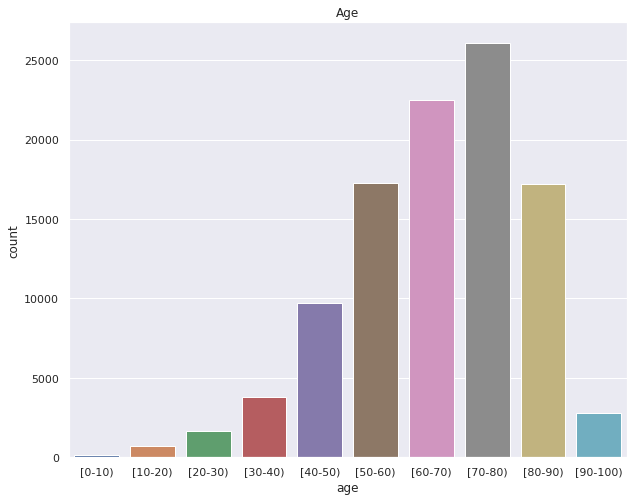

Age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: age, dtype: float64


In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataset.age, data = dataset)
plt.title("Age")
plt.show()

print("Age")
print(dataset.age.value_counts(normalize = True)*100)

Based on data, it looks like people around [70-80] are most for being 'readmitted' to hosipital. 

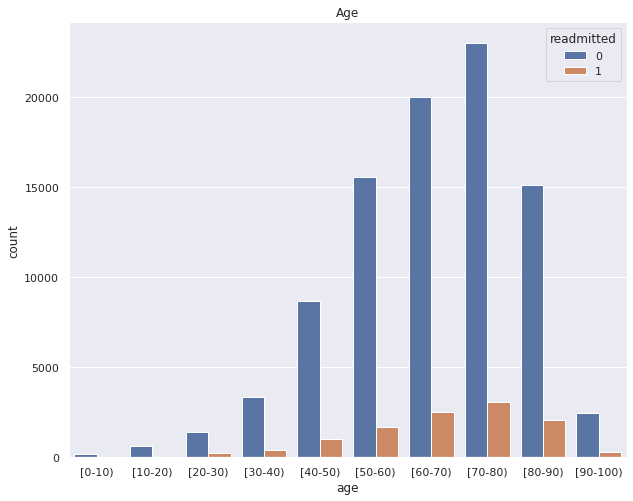

Age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: age, dtype: float64


In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataset.age, data = dataset, hue='readmitted')
plt.title("Age")
plt.show()

print("Age")
print(dataset.age.value_counts(normalize = True)*100)

### Gender

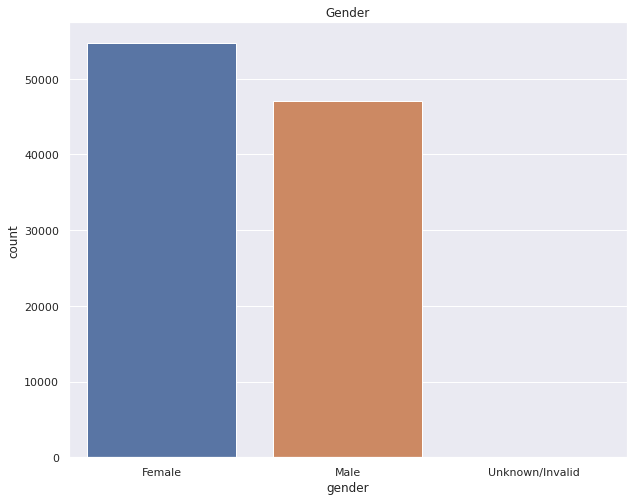

Gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64


In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataset.gender, data = dataset)
plt.title("Gender")
plt.show()

print("Gender")
print(dataset.gender.value_counts(normalize = True)*100)

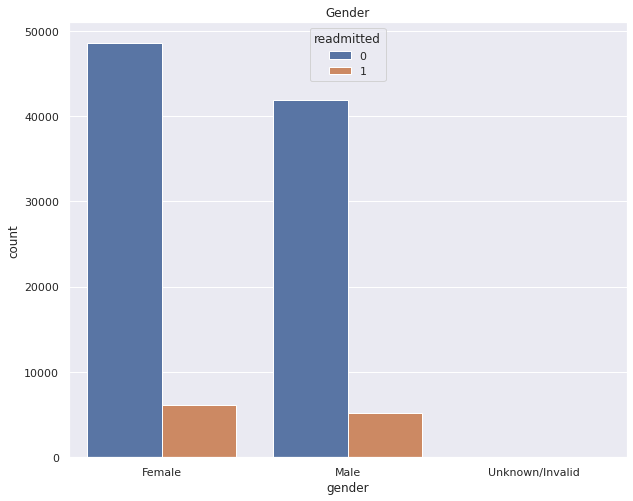

Gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64


In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataset.gender, data = dataset, hue='readmitted')
plt.title("Gender")
plt.show()

print("Gender")
print(dataset.gender.value_counts(normalize = True)*100)

### time_in_hospital

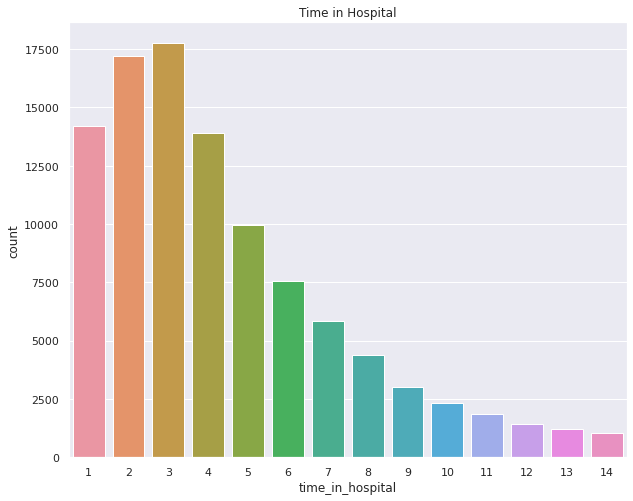

Time in Hospital
<bound method IndexOpsMixin.value_counts of 0          1
1          3
2          2
3          2
4          1
          ..
101761     3
101762     5
101763     1
101764    10
101765     6
Name: time_in_hospital, Length: 101766, dtype: int64>


In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataset.time_in_hospital, data = dataset)
plt.title("Time in Hospital")
plt.show()

print("Time in Hospital")
print(dataset.time_in_hospital.value_counts)

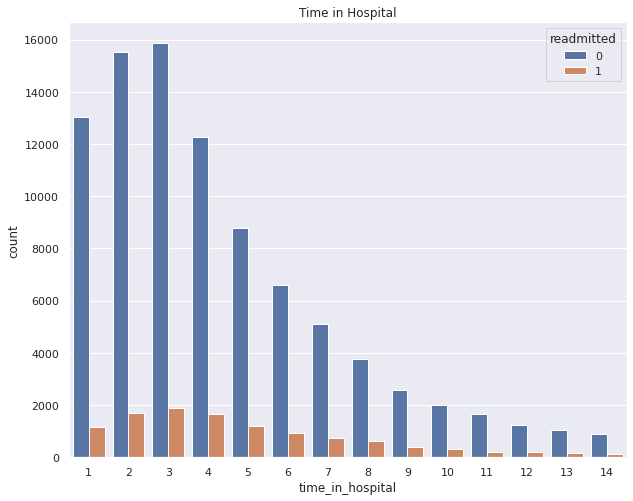

Time in Hospital
<bound method IndexOpsMixin.value_counts of 0          1
1          3
2          2
3          2
4          1
          ..
101761     3
101762     5
101763     1
101764    10
101765     6
Name: time_in_hospital, Length: 101766, dtype: int64>


In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataset.time_in_hospital, data = dataset, hue='readmitted')
plt.title("Time in Hospital")
plt.show()

print("Time in Hospital")
print(dataset.time_in_hospital.value_counts)

### max_glu_serum

In [23]:
dataset.max_glu_serum.unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

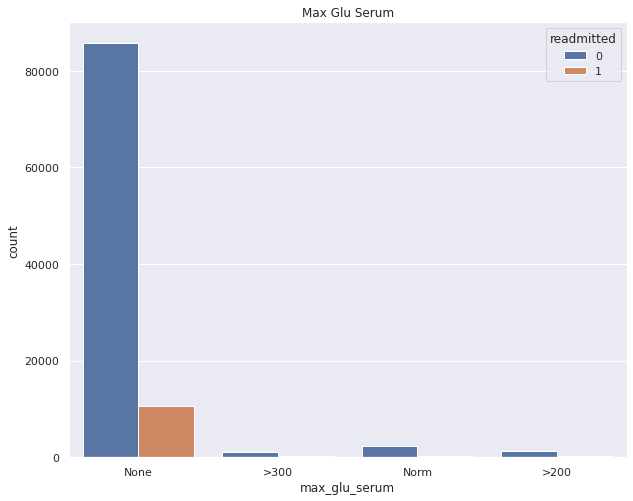

Max Glu Serum
<bound method IndexOpsMixin.value_counts of 0          1
1          3
2          2
3          2
4          1
          ..
101761     3
101762     5
101763     1
101764    10
101765     6
Name: time_in_hospital, Length: 101766, dtype: int64>


In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x=dataset.max_glu_serum, data = dataset, hue="readmitted")
plt.title("Max Glu Serum")
plt.show()

print("Max Glu Serum")
print(dataset.time_in_hospital.value_counts)

## STEP #4: Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [103]:
X = dataset.iloc[0:, 2:5]

In [104]:
X

,race,gender,age
0,Caucasian,Female,[0-10)
1,Caucasian,Female,[10-20)
2,AfricanAmerican,Female,[20-30)
3,Caucasian,Male,[30-40)
4,Caucasian,Male,[40-50)
...,...,...,...
101761,AfricanAmerican,Male,[70-80)
101762,AfricanAmerican,Female,[80-90)
101763,Caucasian,Male,[70-80)
101764,Caucasian,Female,[80-90)


## STEP #5: Data Wrangling

In [59]:
X = X.replace({"Caucasian":1,
               "AfricanAmerican":2,
               "Other":3})

In [60]:
X = X.replace({"Female":1,
               "Male":2,
               "Unknown/Invalid":3})

In [61]:
X = X.replace({"[0-10)":5,
               "[10-20)":15,
               "[20-30)":25,
               "[30-40)":35,
               "[40-50)":45,
               "[50-60)":55,
               "[60-70)":65,
               "[70-80)":75,
               "[80-90)":85,
               "[90-100)":95})

In [62]:
X

,race,gender,age
0,1,1,5
1,1,1,15
2,2,1,25
3,1,2,35
4,1,2,45
...,...,...,...
101761,2,2,75
101762,2,1,85
101763,1,2,75
101764,1,1,85


In [63]:
y = dataset['readmitted']

In [64]:
y

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## STEP #6: Training & Evaluate Models

### 6.0: KNN Analytic Model

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=1)

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 6.0.0: Predictions and Evaluation of KNN Analytic Model

In [69]:
pred_1 = knn.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(confusion_matrix(y_test, pred_1))

[[15196  2960]
 [ 1844   354]]


In [72]:
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86     18156
           1       0.11      0.16      0.13      2198

    accuracy                           0.76     20354
   macro avg       0.50      0.50      0.50     20354
weighted avg       0.81      0.76      0.78     20354



In [73]:
error_rate = []

#will take some time

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

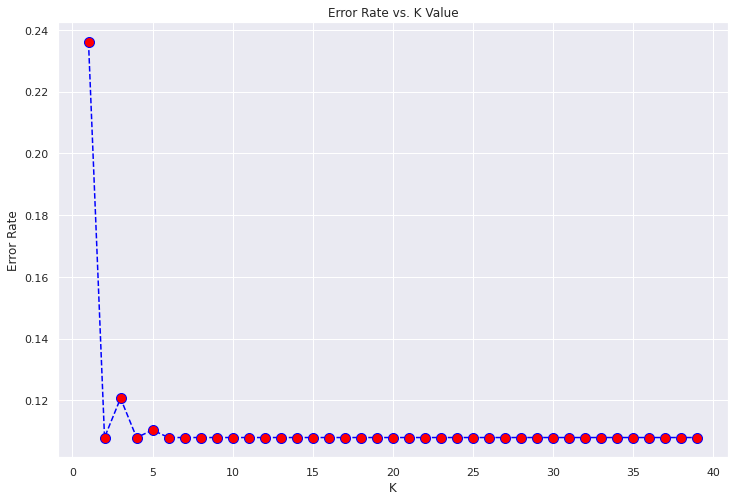

In [74]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [75]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [76]:
knn3.fit(X_train, y_train)
pred_3 = knn3.predict(X_test)

In [77]:
print('With K = 3')
print(confusion_matrix(y_test, pred_3))
print(classification_report(y_test,pred_3))

With K = 3
[[17847   309]
 [ 2148    50]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94     18156
           1       0.14      0.02      0.04      2198

    accuracy                           0.88     20354
   macro avg       0.52      0.50      0.49     20354
weighted avg       0.81      0.88      0.84     20354



5.1: Decision Tree Model

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtree = DecisionTreeClassifier()

In [82]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
DecisionTreeClassifier()

DecisionTreeClassifier()

### 6.1.0: Predictions and Evaluation of Decision Tree

In [86]:
predict_tree = dtree.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18156
           1       0.00      0.00      0.00      2198

    accuracy                           0.89     20354
   macro avg       0.45      0.50      0.47     20354
weighted avg       0.80      0.89      0.84     20354



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
y_test

73105    0
65661    0
1688     0
13975    0
68600    0
        ..
19327    0
91944    0
19719    0
28460    0
22929    0
Name: readmitted, Length: 20354, dtype: int64

In [90]:
predict_tree

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
print(confusion_matrix(y_test,predict_tree))

[[18156     0]
 [ 2198     0]]


### 6.2 Random Forest Model

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc = RandomForestClassifier(n_estimators=100)

In [97]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

### 6.2.0: Predictions and Evaluation of Random Forest Model

In [106]:
rfc_pred = rfc.predict(X_test)

In [99]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18156
           1       0.00      0.00      0.00      2198

    accuracy                           0.89     20354
   macro avg       0.45      0.50      0.47     20354
weighted avg       0.80      0.89      0.84     20354



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
print(confusion_matrix(y_test,rfc_pred))

[[18156     0]
 [ 2198     0]]


## STEP #7: Select **Models**

After comparing three different models, I noticed that KNN (k=3) have better result. 